In [26]:
# 下記セルを実行すると、authorization codeの入力を求められます。
# 出力されたリンク先をクリックし、Googleアカウントにログインし、
# authorization codeをコピーし、貼り付けをおこなってください。
#from google.colab import drive
#drive.mount('/content/drive')

In [27]:
#import os 
#project = '100knock-AImodel'
#chapter = 4
#os.chdir(f'/content/drive/MyDrive/{project}/chapter-{chapter}/')

# 第４章　基礎的な回帰予測を行う10本ノック

## ノック31:データを読み込もう

![](2022-09-18-06-35-32.png)

In [28]:
from sklearn.datasets import load_boston
boston = load_boston()

In [29]:
print("説明変数")
print(f"{len(boston.data)}件")
print(boston.data[:5])

print("目的変数")
print(f"{len(boston.target)}件")
print(boston.target[:5])

print("変数名")
print(f"{len(boston.feature_names)}件")
print(boston.feature_names)


説明変数
506件
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]]
目的変数
506件
[24.  21.6 34.7 33.4 36.2]
変数名
13件
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [30]:
import pandas as pd
df=pd.DataFrame(boston.data, columns=boston.feature_names)
df['MEDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## ノック32:データの概観を把握しよう

In [31]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [32]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

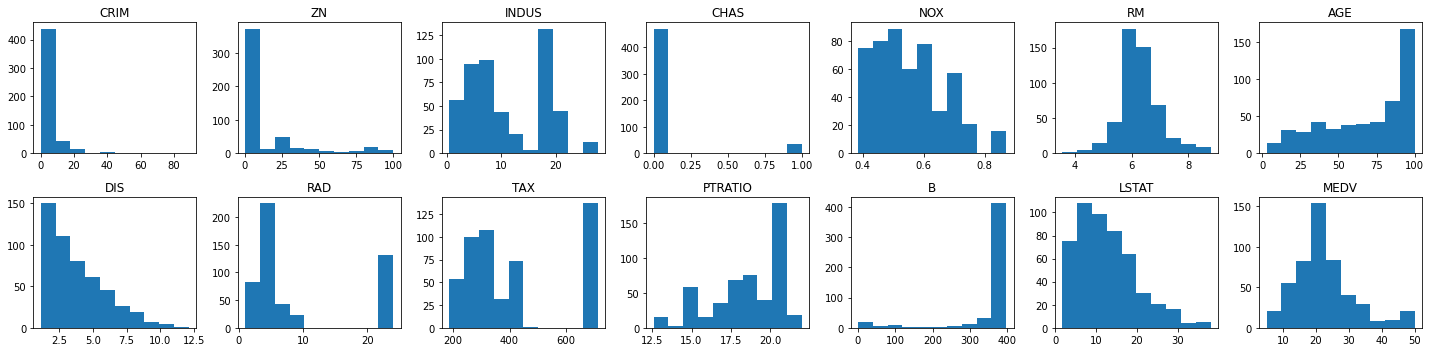

In [33]:
import matplotlib.pyplot as plt 
%matplotlib inline 

plt.figure(figsize=(20,5))
for i,col in enumerate(df.columns):
    plt.subplot(2,7,i+1)
    plt.hist(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

## ノック33:データ同士の相関を把握しよう

In [34]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


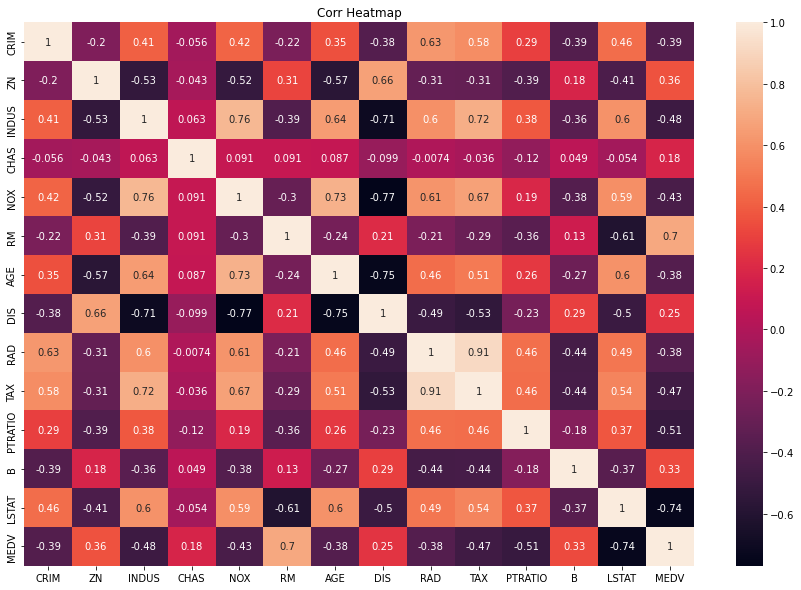

In [35]:
import seaborn as sns 
plt.figure(figsize=(15,10))
sns.heatmap(df_corr, annot=True)
plt.title('Corr Heatmap')
plt.show()

## ノック34:データを分割しよう



In [36]:
X=df[['RM']]
y=df[['MEDV']]

print(X.head())
print(y.head())

      RM
0  6.575
1  6.421
2  7.185
3  6.998
4  7.147
   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


![](2022-09-18-06-58-24.png)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,RM
141,5.019
272,6.538
135,6.335
298,6.345
122,5.961


152


,RM
329,6.333
371,6.216
219,6.373
403,5.349
78,6.232


## ノック:35 単回帰モデルを構築しよう

In [38]:
from sklearn.linear_model import LinearRegression

simple_reg = LinearRegression().fit(X_train,y_train)

## ノック36:モデルを使って値を予測しよう

In [39]:
y_train_pred=simple_reg.predict(X_train)
y_test_pred=simple_reg.predict(X_test)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[10.73920657]
 [24.8831139 ]
 [22.9929143 ]
 [23.08602758]
 [19.51047761]]
152
[[22.97429165]
 [21.88486626]
 [23.34674477]
 [13.81194483]
 [22.03384751]]


## ノック37:予測結果を可視化してみよう

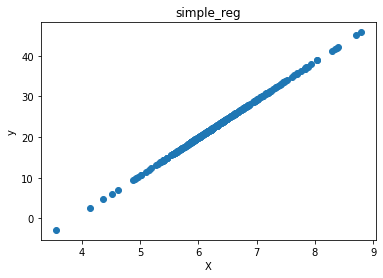

In [40]:
plt.scatter(X_train,y_train_pred)
plt.xlabel('X')
plt.ylabel('y')
plt.title('simple_reg')
plt.show()

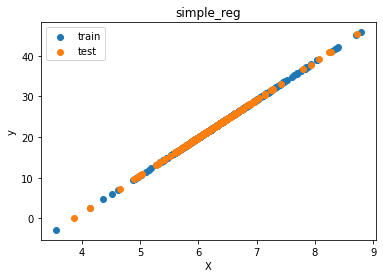

In [41]:
from cProfile import label


plt.scatter(X_train,y_train_pred,label='train')
plt.scatter(X_test,y_test_pred,label='test')
plt.xlabel('X')
plt.ylabel('y')
plt.title('simple_reg')
plt.legend()
plt.show()

In [42]:
#傾きと切片
print(f"a={simple_reg.coef_[0][0]}")
print(f"b={simple_reg.intercept_[0]}")

a=9.311328063251853
b=-35.99434897818352


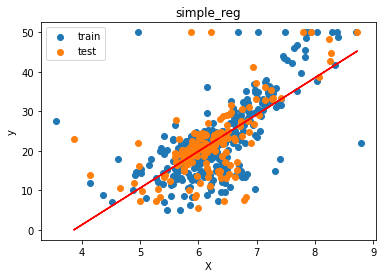

In [43]:
plt.scatter(X_train, y_train, label="train")
plt.scatter(X_test, y_test, label="test")
plt.plot(X_test, y_test_pred, color="red")

plt.xlabel("X")
plt.ylabel("y")
plt.title("simple_reg")
plt.legend()
plt.show()

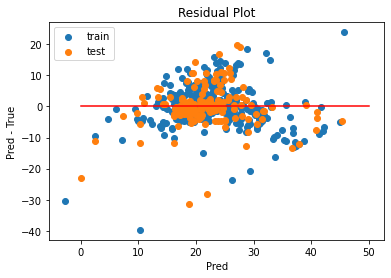

In [45]:
#残差プロット
plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
plt.plot([0, 50], [0, 0], color="red")
plt.xlabel("Pred")
plt.ylabel("Pred - True")
plt.title("Residual Plot")
plt.legend()
plt.show()

![](2022-09-19-06-39-49.png)

## ノック38:精度評価指標を使ってモデルを評価しよう

![](2022-09-19-06-41-30.png)

In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

mae=mean_absolute_error(y_test,y_test_pred)
mse=mean_squared_error(y_test,y_test_pred)
rmse=np.sqrt(mse)
r2score=r2_score(y_test,y_test_pred)

print('test data score')
print(f'MAE={mae}')
print(f'MSE={mse}')
print(f'RMSE={rmse}')
print(f'R2={r2score}')

test data score
MAE=4.470784290506162
MSE=47.03304747975518
RMSE=6.858064412044785
R2=0.43514364832115193


In [48]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse)
r2score_train = r2_score(y_train, y_train_pred)

print('train data score')
print(f'MAE={mae_train}')
print(f'MSE={mse_train}')
print(f'RMSE={rmse_train}')
print(f'R2={r2score_train}')


train data score
MAE=4.429673212104038
MSE=42.15765086312224
RMSE=6.858064412044785
R2=0.5026497630040827


## ノック39:構築したモデルを保存しよう

In [49]:
import pickle

file_path='simple_reg.pkl'
pickle.dump(simple_reg,open(file_path,'wb'))

## ノック40:保存したモデルを利用しよう

In [50]:
file_path='simple_reg.pkl'
model=pickle.load(open(file_path,'rb'))

In [51]:
pred=model.predict(X_test)
print(pred[:5])

[[22.97429165]
 [21.88486626]
 [23.34674477]
 [13.81194483]
 [22.03384751]]
